# 2-Body problem: deflection angle and velocity
We decided to consider the interaction in the case of *unbound orbit*, in particular we tried to verify the analitical formula of the *deflection angle*: $$\theta = 2\phi_0 - \pi \quad where \quad \tan{\phi_0} = - \frac{b\,v_0^2}{GM}$$ and the final values of the two components of the *velocity*: $$v_{1,\parallel} = v_0 \cos{\theta}$$

$$v_{1,\perp} = v_0\sin{\theta}$$

In our simulation we set the following initial conditions:

| Mass | Position (x,y,z) | Velocity ($v_x$, $v_y$, $v_z$) |
| --- | --- | --- |
| 50 | 0, 0, 0 | 0, 0, 0 |
| 1 | -25, 2.5, 0 | 15, 0, 0 |

With an *accuracy parameter* of 0.03, and a *total simulation time* of 15.

### Assumptions

We considered the limit $m_1>>m_2$, this will allow us to consider the total mass $M=m_1+m_2 \sim m_2$ and the reduced mass $\mu=\frac{m_1 \,m_2}{M} \sim m_1$.

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import median_abs_deviation
from scipy.optimize import curve_fit
import astropy.units as u

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[9,7]

## Reading the data

In [103]:
simulation_1 = 'out1.txt'
simulation_2 = 'out2.txt'
simulation_3 = 'out3.txt'
simulation_4 = 'out4.txt'
simulation_5 = 'out5.txt'

file_name = simulation_4

file = open(file_name, 'r')

dim = 3
N_part = int(file.readline()) # read the first line where is written the number of particles
t_0 = file.readline() # read the second line where is written the initial time

file.seek(0) # go back to the beginning of the file

N_lines = len(file.readlines())

print('N_part : ', N_part)
print('initial time : ', t_0)
print('N_lines: ', N_lines)

N_part :  2
initial time :  0.01674979270186815

N_lines:  1992


In [61]:
N_lines_snap = 2+N_part
N_snap = N_lines / N_lines_snap # determine the number of snapshots

print('N snapshot: ', N_snap)

N snapshot:  498.0


In [62]:
N_cols = 7
data = np.empty([int(N_snap), int(N_part), int(N_cols)])
times = np.zeros(int(N_snap))
#masses = np.empty([N_snap, N_part])

for i_snap in range(int(N_snap)):
    initial_line = i_snap * N_lines_snap
    data_init_line = initial_line + 2
    
    times[i_snap] = np.genfromtxt(file_name, skip_header=initial_line+1, max_rows=1)
    #masses[i_snap] = np.genfromtxt(file_name, skip_header=data_init_line, max_rows=N_part, usecols=0)
    values = np.genfromtxt(file_name, skip_header=data_init_line, max_rows=N_part)
    data[i_snap] = values

print(data[0][0])

[ 5.00000000e+01 -2.22589741e-07  2.23341648e-08  0.00000000e+00
 -2.66666513e-05  2.68020030e-06  0.00000000e+00]


In [98]:
masses = np.empty([int(N_snap), int(N_part)])
positions = np.empty([int(N_snap), int(N_part), dim])
velocities = np.empty([int(N_snap), int(N_part), dim])


for i in range(int(N_snap)):
    for j in range(int(N_part)):
        masses[i,j] = data[i,j,0]
        positions[i,j] = data[i,j,1:4]
        velocities[i,j] = data[i,j,4:]


## Data analysis

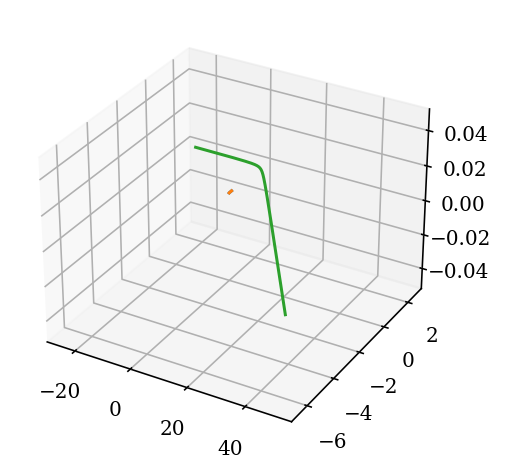

In [99]:
from mpl_toolkits import mplot3d

%matplotlib inline
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection = '3d')
plt.plot(positions[:,0,0], positions[:,0,1], positions[:,0,2])

ax.plot3D(positions[:,0,0], positions[:,0,1], positions[:,0,2])
ax.plot3D(positions[:,1,0], positions[:,1,1], positions[:,1,2])

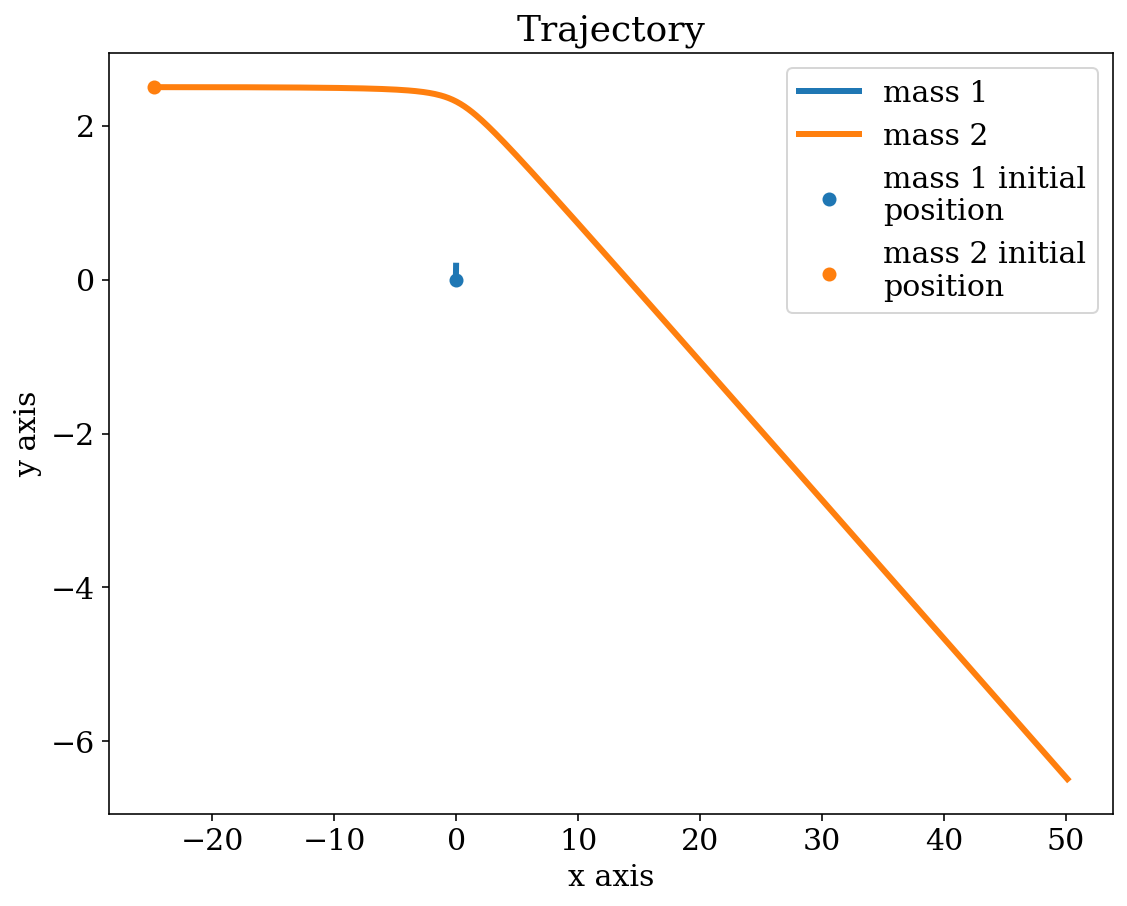

In [104]:
plt.plot(positions[:,0,0], positions[:,0,1], label='mass 1', lw=3)
plt.plot(positions[:,1,0], positions[:,1,1], label='mass 2', lw=3)
plt.scatter(positions[0,0,0], positions[0,0,1], label='mass 1 initial\nposition')
plt.scatter(positions[0,1,0], positions[0,1,1], label='mass 2 initial\nposition')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.title('Trajectory')
plt.show()

## Find the angle between the initial and the final trajectory
We fit the two sections of the trajectory, before and after the interaction

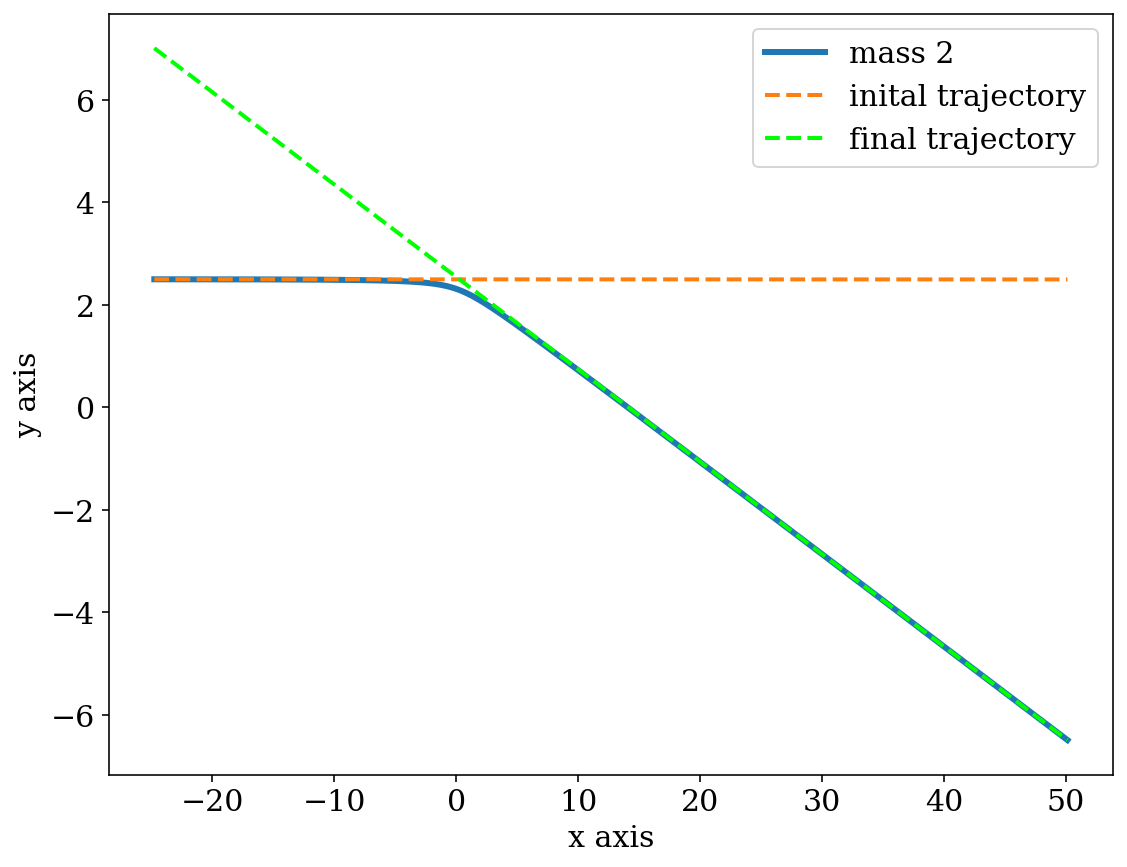

In [117]:
init_line_fit = np.polyfit(positions[:,1,0][:10], positions[:,1,1][:10], 1)
init_line = np.poly1d(init_line_fit)

final_line_fit = np.polyfit(positions[:,1,0][-10:], positions[:,1,1][-10:], 1)
final_line = np.poly1d(final_line_fit)

init_traj = init_line(positions[:,1,0])
final_traj = final_line(positions[:,1,0])

#plt.plot(positions[:,0,0], positions[:,0,1], label='particle 1')
plt.plot(positions[:,1,0], positions[:,1,1], label='mass 2', lw=3)
plt.plot(positions[:,1,0], init_traj, label='inital trajectory', ls='--', lw=2)
plt.plot(positions[:,1,0], final_traj, label='final trajectory', ls='--', lw=2, color='lime')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.show()

The tangent of the deflection angle can be computed from the angular coefficients of the lines:

$$\tan{\theta} = \frac{m_f-m_i}{1 + m_fm_i}$$

In [111]:
tg_theta = (final_line[1] - init_line[1]) / (1 + init_line[1]*final_line[1])
theta_rad = np.arctan(tg_theta) # to pick the right angle
theta_deg = 360*theta_rad/(2*np.pi) # conversion in degrees
print('theta= ', round(theta_deg, 3), "°")

theta=  -10.217 °


This is the numerical result.

Now we can compute the theoretical expectation:

$$\theta = 2\phi_0 - \pi \quad where \quad \tan{\phi_0} = - \frac{b\,v_0^2}{GM}$$

In [110]:
b = positions[0,1,1] - positions[0,0,1]
M = masses[0,0]
v_0 = velocities[0,1,0] 
G = 1

tan_phi0 = - (b*v_0**2)/(G*M)
phi0 = np.arctan(tan_phi0)

theta_th = (2*phi0 - np.pi)*360/(2*np.pi)
print("Theoretical result= ", round(tan_phi0, 3), "°")

Theoretical result=  -11.252 °


## Velocity
We can also compute the final components of the velocity, according to the two-body unbound interaction case computations.

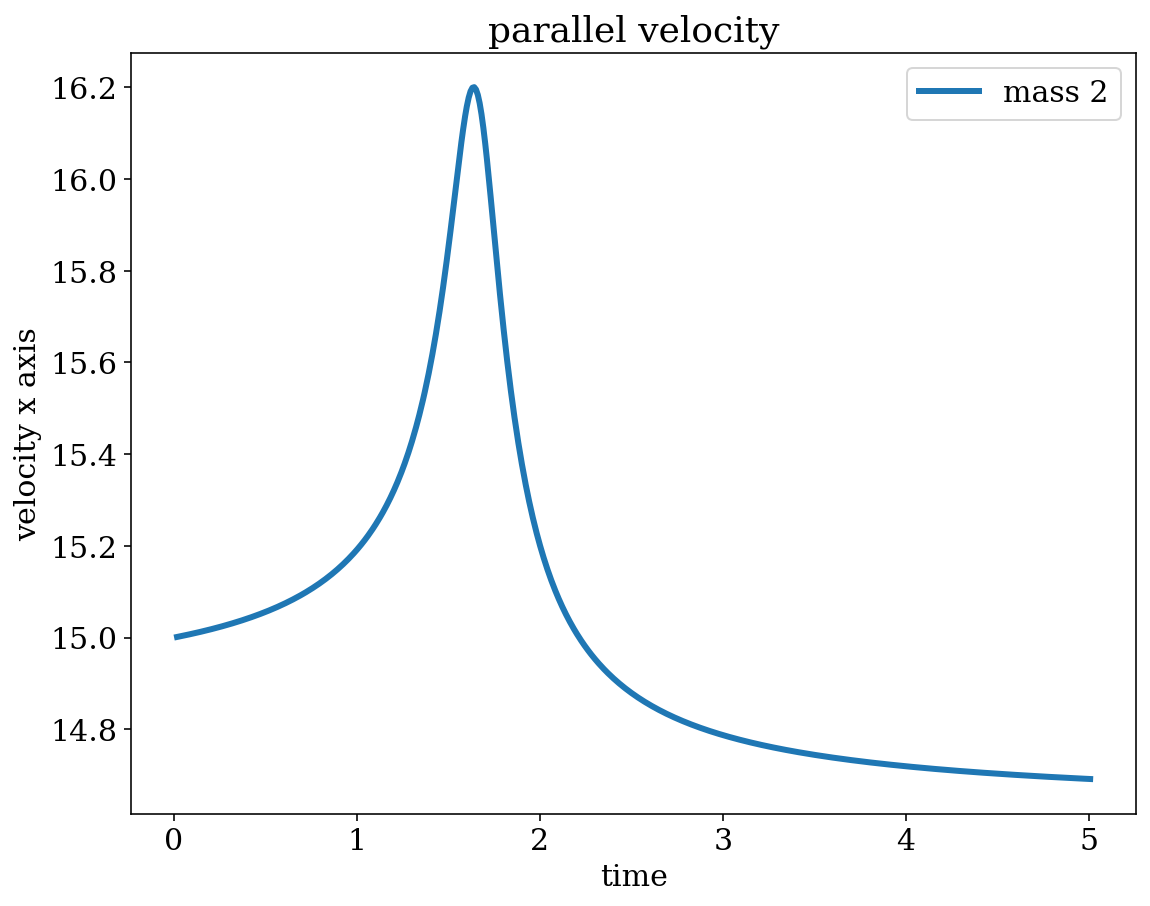

In [115]:
#plt.plot(positions[:,0,0], velocities[:,0,1], label='particle 1')
plt.plot(times, velocities[:,1,0], label='mass 2', lw=3)
plt.xlabel('time')
plt.ylabel('velocity x axis')
plt.title('parallel velocity')
plt.legend()
plt.show()

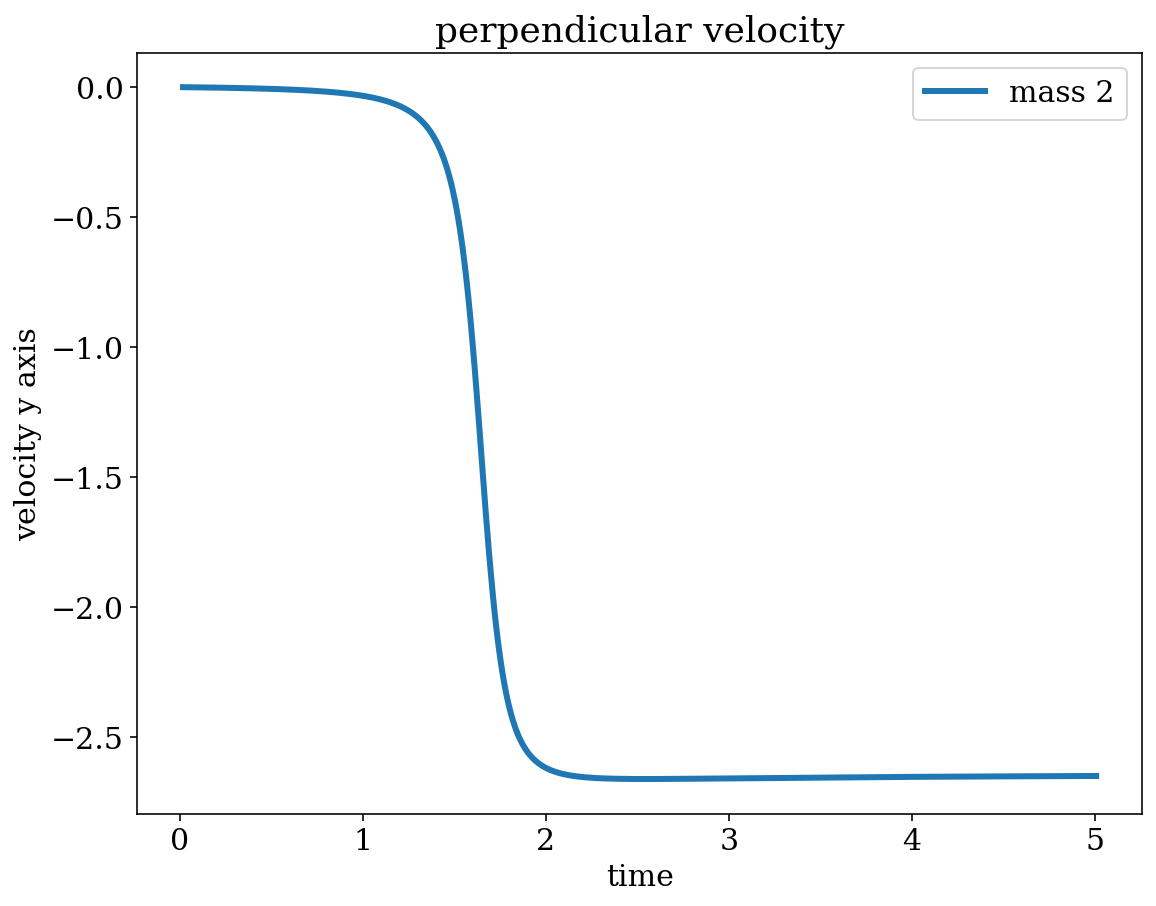

In [116]:
#plt.plot(positions[:,0,0], velocities[:,0,1], label='particle 1')
plt.plot(times, velocities[:,1,1], label='mass 2', lw=3)
plt.xlabel('time')
plt.ylabel('velocity y axis')
plt.title('perpendicular velocity')
plt.legend()
plt.show()

In [112]:
vf_paral = velocities[-1,1,0]
vf_perp = velocities[-1,1,1]

print('v_f parallel:', round(vf_paral, 3))
print('v_f perpendicular: ', round(vf_perp,3))

v_f parallel: 14.692
v_f perpendicular:  -2.648


These are the numerical results, according to the theory, the final velocities components in the two direction should be given by:

$v_{1,\parallel} = v_0 \cos{\theta}$

$v_{1,\perp} = v_0\sin{\theta}$

In [114]:
vf_paral_th = v_0*np.cos(theta_rad)
vf_perp_th = v_0*np.sin(theta_rad)

print("Theoretical result:")
print('v_f parallel= ', round(vf_paral_th,3))
print('v_f perpendicular= ', round(vf_perp_th,3))

Theoretical result:
v_f parallel=  14.763
v_f perpendicular=  -2.661


## Conclusions 
From the simulation we computed the results for the deflection angle and for the components of the velocity.

In particular we found the value of the angle $\theta=-10.217°$, which is in agreement with the theoretical expectation $\theta_{th}=-11.252°$. 

Considering instead the two components of the velocity, the simulation provides the following results: $$v_{f,\parallel}=14.692$$ $$v_{f,\perp}=-2.648$$
which are comparable with the theoretical expectation: $$v_{f,\parallel} = v_0 \cos{\theta}=14.763$$ $$v_{f,\perp} = v_0\sin{\theta}=-2.661$$